# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [141]:
data = pd.read_csv("pollution_dataset.csv")
data

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5.2                 619    Moderate  
3                              11.1                 551        Good  
4                              12.7                 303        Good  
...                             ...                 ...         ...  
4995                            2.8                 765   Hazardous  
4996                            5.7                 709    Moderate  
4997                            9.6                 379    Moderate  
4998                           11.6                 241        Good  
4999                            8.3                 461    Moderate  

[5000 rows x 10 columns]

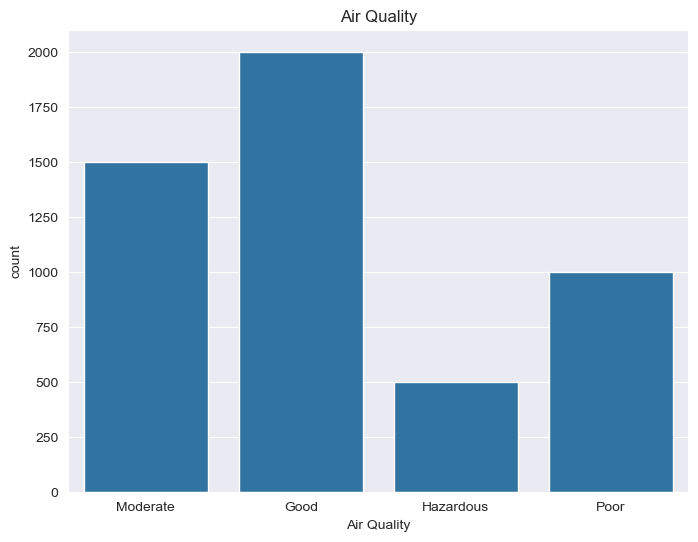

In [6]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x="Air Quality", data=data)
plt.title('Air Quality')
plt.show()

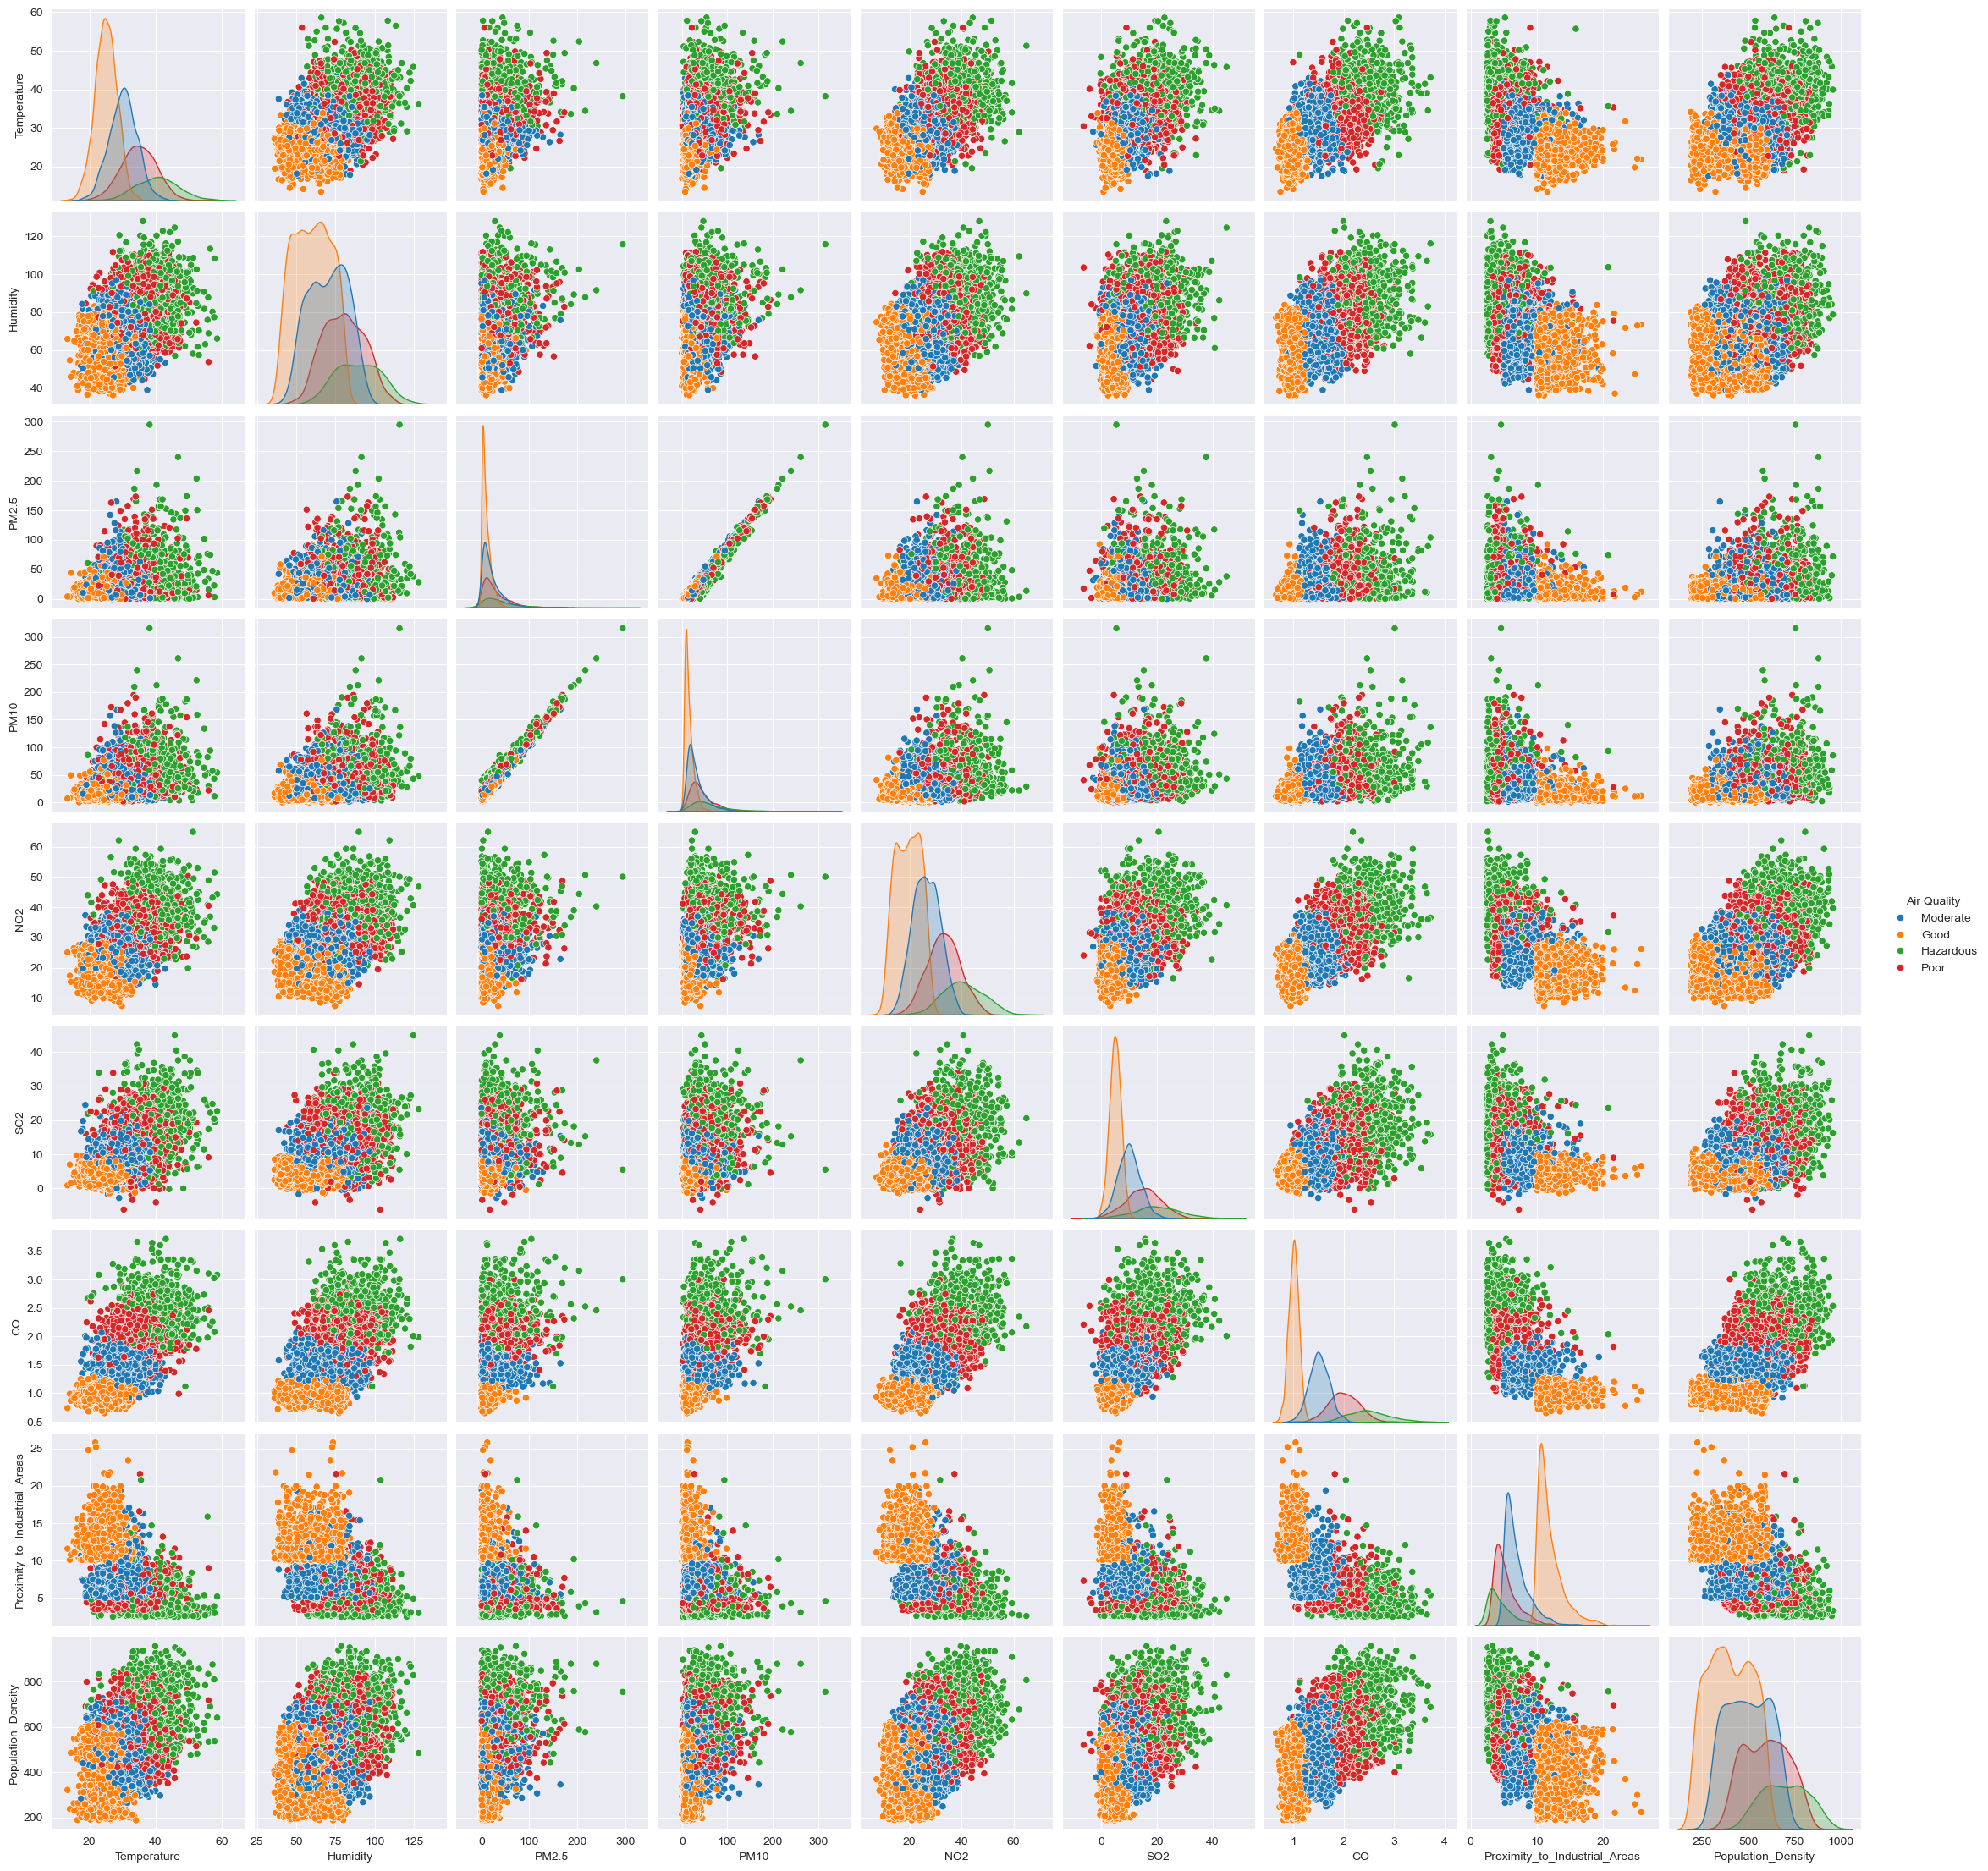

In [8]:
sns.pairplot(data=data, hue="Air Quality")

In [142]:
encoded = pd.get_dummies(data['Air Quality'])
data = pd.concat([data, encoded.astype(int)], axis=1)
data

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  Good  \
0                               6.3                 319    Moderate     0   
1                               6.0                 611    Moderate     0   
2                               5.2                 619    Moderate     0   
3                              11.1                 551        Good     1   
4                              12.7                 303        Good     1   
...                             ...                 ...         ...   ...   
4995                            2.8                 765   Hazardous     0   
4996                            5.7                 709    Moderate     0   
4997                            9.6                 379    Moderate     0   
4998                           11.6                 241        Good     1   
4999                            8.3                 461    Moderate     0   

      Hazardous  Moderate  Poor  
0             0         1     0  
1             0         1     0  
2             0         1     0  
3             0         0     0  
4             0         0     0  
...         ...       ...   ...  
4995          1         0     0  
4996          0         1     0  
4997          0         1     0  
4998          0         0     0  
4999          0         1     0  

[5000 rows x 14 columns]

In [143]:
X = data.drop(columns=['Air Quality','Good','Hazardous','Moderate','Poor'], axis=1)
Y = data[['Good','Hazardous','Moderate','Poor']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [150]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])
model1.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [154]:
model1.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686 (2.68 KB)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 458 (1.79 KB)

In [160]:
history1 = model1.fit(X_train, Y_train, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9408 - loss: 0.1508 - val_accuracy: 0.9600 - val_loss: 0.1339
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1426 - val_accuracy: 0.9625 - val_loss: 0.1364
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1363 - val_accuracy: 0.9500 - val_loss: 0.1352
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1380 - val_accuracy: 0.9625 - val_loss: 0.1383
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.1542 - val_accuracy: 0.9625 - val_loss: 0.1350
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9479 - loss: 0.1371 - val_accuracy: 0.9550 - val_loss: 0.1332
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9368 - loss: 0.1546 - val_accuracy: 0.9625 - val_loss: 0.1350
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.1545 - val_accuracy: 0.

<Axes: >

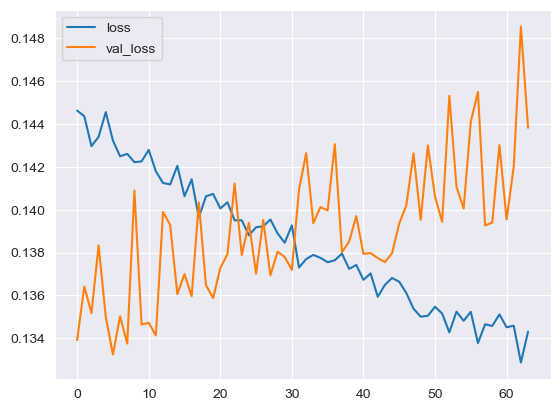

In [161]:
sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

In [171]:
model2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(4, activation='softmax')
])
model2.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:
model2.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,316 (12.95 KB)

 Trainable params: 3,316 (12.95 KB)

 Non-trainable params: 0 (0.00 B)

In [173]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6882 - loss: 0.8302 - val_accuracy: 0.9150 - val_loss: 0.2820
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2625 - val_accuracy: 0.9225 - val_loss: 0.2275
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2065 - val_accuracy: 0.9400 - val_loss: 0.1677
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.1822 - val_accuracy: 0.9475 - val_loss: 0.1615
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - loss: 0.1883 - val_accuracy: 0.9225 - val_loss: 0.1721
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.1750 - val_accuracy: 0.9400 - val_loss: 0.1757
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.1861 - val_accuracy: 0.9400 - val_loss: 0.1616
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.1684 - val_accuracy: 0.

<Axes: >

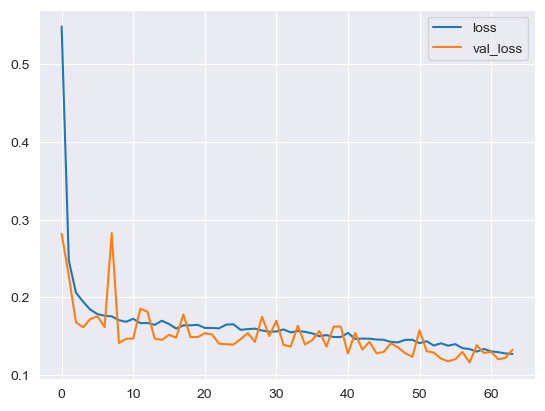

In [174]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [175]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])
model3.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [176]:
model3.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,796 (38.27 KB)

 Trainable params: 9,796 (38.27 KB)

 Non-trainable params: 0 (0.00 B)

In [177]:
history3 = model3.fit(X_train, Y_train, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6492 - loss: 0.8832 - val_accuracy: 0.8750 - val_loss: 0.3008
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.2737 - val_accuracy: 0.9275 - val_loss: 0.2118
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.2101 - val_accuracy: 0.9450 - val_loss: 0.1720
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.1948 - val_accuracy: 0.9525 - val_loss: 0.1630
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1840 - val_accuracy: 0.9350 - val_loss: 0.1843
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9294 - loss: 0.1781 - val_accuracy: 0.9375 - val_loss: 0.1586
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9367 - loss: 0.1542 - val_accuracy: 0.9500 - val_loss: 0.1465
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.1676 - val_accuracy: 0.

<Axes: >

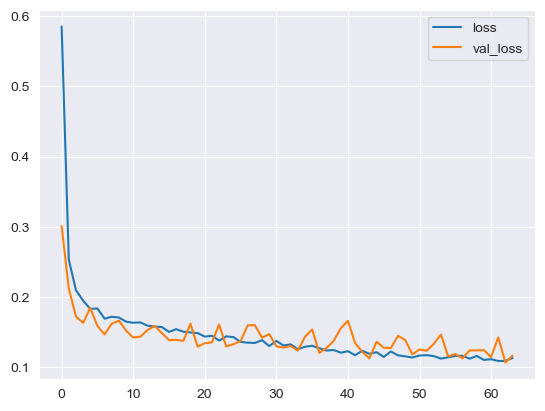

In [178]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')

In [180]:
Y_pred1 = model1.predict(X_test).round()
Y_pred2 = model2.predict(X_test).round()
Y_pred3 = model3.predict(X_test).round()

y_pred1_labels = np.argmax(Y_pred1, axis=1)
Y_pred2_labels = np.argmax(Y_pred2, axis=1)
Y_pred3_labels = np.argmax(Y_pred3, axis=1)
y_test_labels = np.argmax(Y_test, axis=1)

print("MODEL 1:")
print(confusion_matrix(y_test_labels, y_pred1_labels))
print(classification_report(y_test_labels, y_pred1_labels))
print(f' Accuracy: {accuracy_score(y_test_labels, y_pred1_labels) * 100}%\n\n')

print("MODEL 2:")
print(confusion_matrix(y_test_labels, Y_pred2_labels))
print(classification_report(y_test_labels, Y_pred2_labels))
print(f' Accuracy: {accuracy_score(y_test_labels, Y_pred2_labels) * 100}%\n\n')

print("MODEL 3:")
print(confusion_matrix(y_test_labels, Y_pred3_labels))
print(classification_report(y_test_labels, Y_pred3_labels))
print(f' Accuracy: {accuracy_score(y_test_labels, Y_pred3_labels) * 100}%')



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MODEL 1:
[[411   0   0   0]
 [  0  82   0  24]
 [  3   0 289   3]
 [  0  14  17 157]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       411
           1       0.85      0.77      0.81       106
           2       0.94      0.98      0.96       295
           3       0.85      0.84      0.84       188

    accuracy                           0.94      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.94      0.94      0.94      1000

 Accuracy: 93.89999999999999%


MODEL 2:
[[411   0   0   0]
 [  0  87   0  19]
 [  1   0 283  11]
 [  0  25   5 158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.78      0.82      0.80       106
           2       0.98      0.96      0.97       295
           3       0.84 